In [811]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

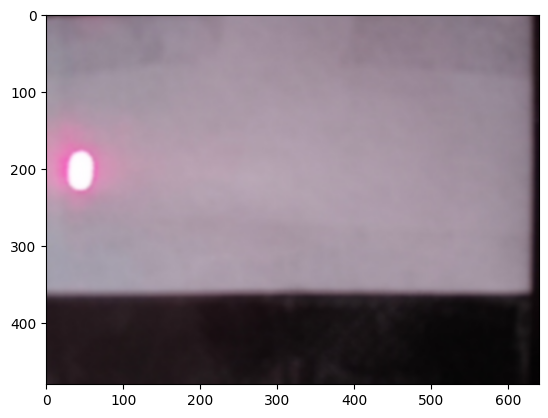

In [812]:
img = io.imread('img228/img_1.jpeg')
orig_img = img.copy()

img = cv2.GaussianBlur(img, (9, 9), 0)
plt.imshow(img)

In [813]:

red_img = img[:,:,2]

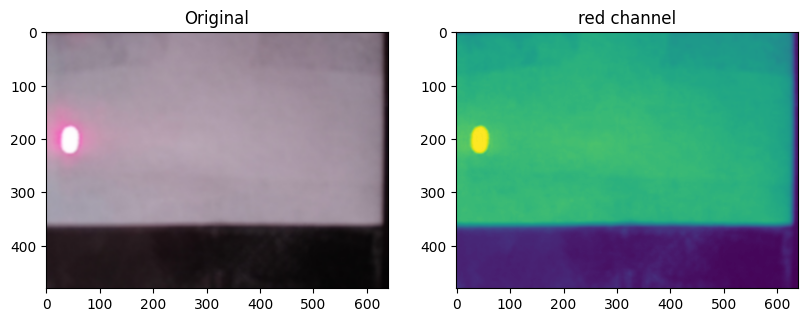

In [814]:
# hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)


plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(red_img), plt.title('red channel')
plt.show()

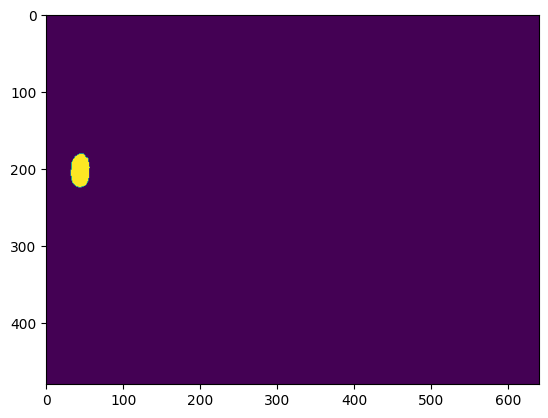

In [815]:
result = red_img.copy()

mask = cv2.inRange(result, 253, 255)
img = cv2.bitwise_and(red_img, red_img, mask=mask)
plt.imshow( mask)

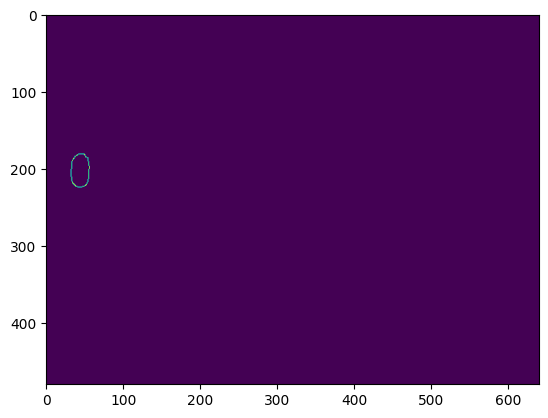

In [816]:
canny_edges = cv2.Canny(img, 0, 255)

plt.imshow(canny_edges)

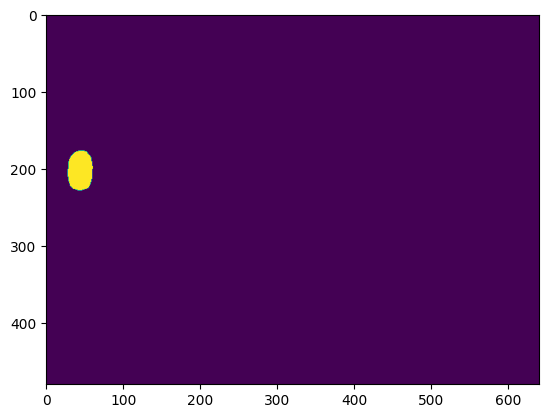

In [817]:
import imutils


cnts = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = imutils.grab_contours(cnts)

for c in cnts:
    cv2.drawContours(canny_edges, [c], -1, (255,255,255), thickness=7)



cnts = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = imutils.grab_contours(cnts)

blank_image = np.zeros((list(canny_edges.shape)[0],list(canny_edges.shape)[1]), np.uint8)

max_cntr_area = 0

for c in cnts:
    area = cv2.contourArea(c)
    if area > max_cntr_area:
        max_cntr_area = area

for c in cnts:
    if cv2.contourArea(c) == max_cntr_area:
        cv2.drawContours(blank_image, [c], -1, (255,255,255), thickness=cv2.FILLED)

plt.imshow(blank_image)

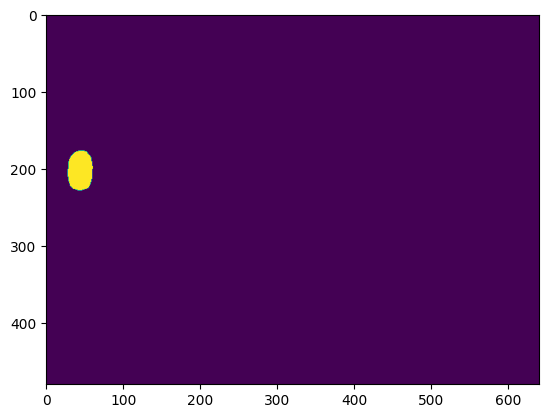

In [818]:

for c in cnts:
    if cv2.contourArea(c) == max_cntr_area:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        
        
plt.imshow(blank_image)



# по камере

In [819]:
def findCenterOfLaser(img: cv2.Mat):
    red_img = img[:,:,2]
    
    result = red_img.copy()

    mask = cv2.inRange(result, 253, 255)
    img = cv2.bitwise_and(red_img, red_img, mask=mask)

    canny_edges = cv2.Canny(img, 0, 255)

    cnts = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = imutils.grab_contours(cnts)

    for c in cnts:
        cv2.drawContours(canny_edges, [c], -1, (255,255,255), thickness=7)



    cnts = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = imutils.grab_contours(cnts)

    blank_image = np.zeros((list(canny_edges.shape)[0],list(canny_edges.shape)[1]), np.uint8)

    max_cntr_area = 0

    for c in cnts:
        area = cv2.contourArea(c)
        if area > max_cntr_area:
            max_cntr_area = area

    for c in cnts:
        if cv2.contourArea(c) == max_cntr_area:
            cv2.drawContours(blank_image, [c], -1, (255,255,255), thickness=cv2.FILLED)


    for c in cnts:
        if cv2.contourArea(c) == max_cntr_area:
            M = cv2.moments(c)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            return cX, cY, blank_image


In [820]:
# cam = cv2.VideoCapture(2)
import urllib.request
import zipfile

while True:
    urllib.request.urlretrieve("http://192.168.1.72:5001/images", "images.zip")
    with zipfile.ZipFile('images.zip', 'r') as zip_ref:
        zip_ref.extractall('images')

    # _, frame = cam.read()
    frame = cv2.imread('images/img_0.jpeg')

    res = findCenterOfLaser(frame.copy())
    centerX = None
    centerY = None

    filtered = np.zeros((list(frame.shape)[0],list(frame.shape)[1]), np.uint8)

    if res:
        centerX = res[0]
        centerY = res[1]
        filtered = res[2]
        cv2.circle(frame, (centerX, centerY), 5, color = (0, 255, 0) , thickness=-1) 
        cv2.putText(frame, 'CENTER', (centerX, centerY), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        cv2.putText(filtered, 'CENTER', (centerX, centerY), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        cv2.circle(filtered, (centerX, centerY), 5, color = (0, 255, 0) , thickness=-1) 
        

    cv2.imshow('orig', frame)
    
    cv2.imshow('filtered', filtered)
    


    if cv2.waitKey(1) == ord('q'):
        break


# cam.release()
cv2.destroyAllWindows()